In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [20]:
df=pd.read_csv('house_rental_data.csv.txt',index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [21]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [22]:
print(df.shape)

(645, 7)


In [23]:
df=df.drop_duplicates()

In [24]:
df.shape

(579, 7)

Optimal K value

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

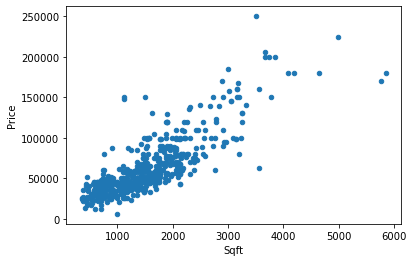

In [29]:
df.plot(kind='scatter',x='Sqft',y='Price')

In [69]:
df.drop(df.index[list((np.where(df['Sqft']>2500)))],inplace=True)
df.drop(df.index[list((np.where(df['Price']>100000)))],inplace=True)



c:\Users\91805\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


<AxesSubplot:xlabel='Sqft', ylabel='Price'>

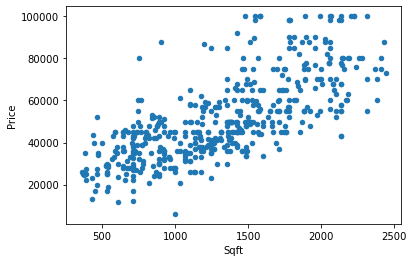

In [70]:
df.plot(kind='scatter',x='Sqft',y='Price')

c:\Users\91805\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


<AxesSubplot:xlabel='Sqft', ylabel='Price'>

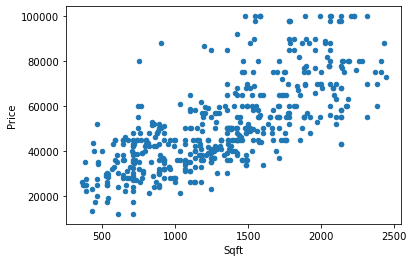

In [87]:
df.drop(df.index[list((np.where(df['Price']<10000)))],inplace=True)
df.plot(kind='scatter',x='Sqft',y='Price')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

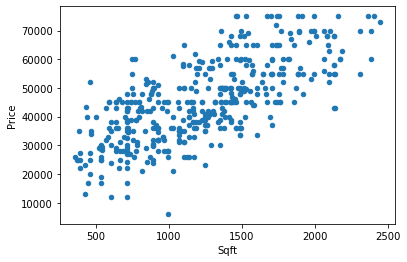

In [83]:
df2=df.drop(df.index[list((np.where(df['Sqft']>2000)))])
df2=df.drop(df.index[list((np.where(df['Price']>75000)))])
df2.plot(kind='scatter',x='Sqft',y='Price')

In [71]:

df.shape

(505, 7)

In [72]:
x=df['Sqft']
y=df['Price']
x

1      1177.698
2      2134.800
3      1138.560
4      1458.780
5       967.776
         ...   
641    1707.840
644    1359.156
645     377.148
646     740.064
648    1376.946
Name: Sqft, Length: 505, dtype: float64

In [73]:
df1=pd.merge(x,y,left_index=True,right_index=True)

In [74]:
df1

,Sqft,Price
1,1177.698,62000
2,2134.800,78000
3,1138.560,58000
4,1458.780,45000
5,967.776,45000
...,...,...
641,1707.840,60000
644,1359.156,45000
645,377.148,24800
646,740.064,45000


In [75]:
scalar=MinMaxScaler()
scalar.fit(X=df1)
df1=scalar.transform(X=df1)

In [76]:
df1=pd.DataFrame(df1,columns=['Sqft','Price'])
df1.head()

,Sqft,Price
0,0.392491,0.595314
1,0.851536,0.765708
2,0.373720,0.552716
3,0.527304,0.414271
4,0.291809,0.414271


<AxesSubplot:xlabel='Sqft', ylabel='Price'>

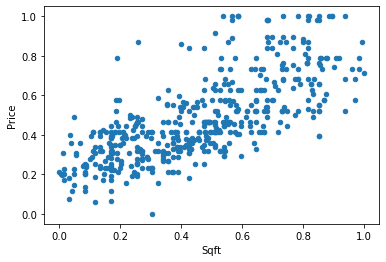

In [77]:
df1.plot(kind='scatter',x='Sqft',y='Price')

In [78]:
S=[]
k_range= range(1,15)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df1)
    S.append(km.inertia_)

c:\Users\91805\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


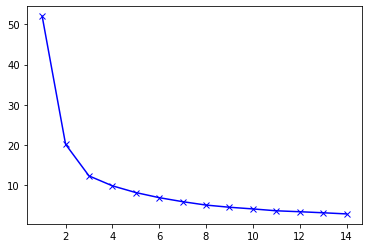

In [79]:
plt.plot(k_range,S,'bx-')
plt.show()

In [80]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df1[['Sqft','Price']])
y_pred

array([2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 1,
       1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1,
       2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,

In [85]:

df['Cluster']=y_pred

In [86]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
1,1177.698,2,7,2,2,2,62000,2
2,2134.800,5,7,4,2,2,78000,1
3,1138.560,5,7,2,2,1,58000,2
4,1458.780,2,7,3,2,2,45000,2
5,967.776,11,14,3,2,2,45000,0
...,...,...,...,...,...,...,...,...
641,1707.840,9,9,4,2,2,60000,2
644,1359.156,7,15,3,2,2,45000,2
645,377.148,4,10,1,1,1,24800,0
646,740.064,13,14,1,1,1,45000,0
